<style type="text/css">
    ol { list-style-type: upper-alpha; }
</style>

<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>

<center> <h3> Module 5: Fundamentos de Machine Learning</h3> </center>
<center> <h4> Ejemplos</h4> </center>

# Método de la varianza

Vamos a usar el método de sklearn llamado VarianceThreshold. Este elimina todas las características cuya varianza no alcanza algún umbral. De forma predeterminada, elimina todas las características de varianza cero, es decir, las características que tienen el mismo valor en todas las muestras.

Como era de esperar, VarianceThreshold eliminó la primera columna que tiene una probabilidad de más de un 83 % de tener 0.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
print(X)

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
Y = sel.fit_transform(X)
print(Y)

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
[[0 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]


# Enfoque Univariante Chi Cuadrado

En este método el objetivo es encontrar el **subconjunto** con las variables más relevantes en base a un **ranking** de acuerdo a las **relevancias individuales**. En este caso escogemos el método **SelectKBest** con el test estadístico chi-cuadrado. En el ejemplo seleccionaremos las 2 primeras variables que den la mayor puntuación en el test estadístico.

Recordemos que la prueba de **chi-cuadrado** mide la dependencia entre variables estocásticas, por lo que el uso de esta función "elimina" las características que tienen más probabilidades de ser independientes de la clase y, por lo tanto, irrelevantes para la clasificación.

In [ ]:
from pandas import *
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X, y = load_iris(return_X_y=True, as_frame=True)
print(X.shape)
print(X.head())

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print(X_new.shape)
print(X_new)


(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
(150, 2)
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2

Selección de variables utilizando la importancia relativa de variables cuando entrenamos un clasificador ExtraTrees.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

X, y = load_iris(return_X_y=True)
print(X.shape)

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print(X_new.shape)


(150, 4)
(150, 2)


# Métodos de Búsqueda

Los métodos de búsqueda intentan medir o usar un subconjunto de características y entrenar un modelo para buscar la utilidad de las mismas. Es decir, buscan en el espacio de las variables qué subconjunto funciona mejor. En función de la evaluación que extraemos del modelo anterior, decidimos agregar o eliminar funciones de su subconjunto.

## Búsqueda hacia adelante y hacia atrás

Veamos el siguiente ejemplo donde utilizamos mediante código ambas técnicas presentadas anteriormente. Mediante la función **SequentialFeatureSelector** (**SFS**) en cada iteración elegimos la mejor característica nueva para agregar a nuestras características seleccionadas en función de una puntuación de validación cruzada. Es decir, comenzamos con 0 variables y elegimos la mejor variable individual con la puntuación más alta. El procedimiento se repite hasta llegar al número deseado de características seleccionadas.

También podemos ir en la dirección inversa (**SFS hacia atrás**), es decir, comenzar con todas las funciones y probar a eliminarlas una por una. Ilustramos ambos enfoques aquí.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

feature_names = np.array(diabetes.feature_names)

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)


sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=3, direction="forward").fit(X, y)
sfs_backward = SequentialFeatureSelector(ridge, n_features_to_select=3, direction="backward").fit(X, y)

print("Features selected by forward sequential selection: "f"{feature_names[sfs_forward.get_support()]}")
print("Features selected by backward sequential selection: "f"{feature_names[sfs_backward.get_support()]}")

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Recursive Feature elimination

Es un algoritmo de optimización voraz que tiene como objetivo encontrar el subconjunto de funciones con mejor rendimiento. Crea modelos repetidamente y deja de lado la característica de mejor o peor rendimiento en cada iteración. Construye el siguiente modelo con las características de la izquierda hasta agotar todas las características. Luego clasifica las características según el orden de su eliminación. Es muy similar a la búsqueda hacia atrás con algunas variaciones a la hora de posicionar las variables más relevantes.

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
print(X.shape)

estimator = SVR(kernel="linear")

selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

print(selector.support_)
print(selector.ranking_)

#Resultado del código ejecutado
#array([1, 1, 1, 1, 1, 6, 4, 3, 2, 5])

(50, 10)
[ True  True  True  True  True False False False False False]
[1 1 1 1 1 6 4 3 2 5]


## Minimum Redundancy Maximal Relevance
    
Los métodos mínimo-óptimo buscan identificar un **pequeño** conjunto de características que, juntas, tienen el **máximo poder predictivo posible**. Por otro lado, los algoritmos relevantes están diseñados para seleccionar todas las características que, individualmente, tienen algún poder predictivo.

In [ ]:
pip install mrmr_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
from mrmr import mrmr_classif
from sklearn.datasets import make_classification
import pandas as pd 

# create some data
X, y = make_classification(n_samples = 1000, n_features = 50, n_informative = 10, n_redundant = 40)
X = pd.DataFrame(X)
y = pd.Series(y)

# use mrmr classification
selected_features = mrmr_classif(X, y, K = 10)

100%|██████████| 10/10 [00:00<00:00, 18.75it/s]


# Métodos Embedded

## La regresión L1 o LASSO

Veamos un ejemplo utilizando Lasso y viendo qué variables son seleccionadas por el algoritmo. En este caso vamos a entrenar el modelo sobre el dataset de diabetes. Vamos a buscar el mejor modelo con una validación cruzada de 5 cortes sobre el hiper parámetro alfa. Una vez tengamos el mejor modelo, vamos a explorar qué variables pasan a ser cero y son descartadas.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes

X,y = load_diabetes(return_X_y=True)

features = load_diabetes()['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

search.fit(X_train,y_train)
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
np.array(features)[importance > 0]
np.array(features)[importance == 0]

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ..............model__alpha=0.1;, score=-3051.708 total time=   0.0s
[CV 2/5] END ..............model__alpha=0.1;, score=-3405.374 total time=   0.0s
[CV 3/5] END ..............model__alpha=0.1;, score=-2593.337 total time=   0.0s
[CV 4/5] END ..............model__alpha=0.1;, score=-3309.628 total time=   0.0s
[CV 5/5] END ..............model__alpha=0.1;, score=-3512.110 total time=   0.0s
[CV 1/5] END ..............model__alpha=0.2;, score=-3057.672 total time=   0.0s
[CV 2/5] END ..............model__alpha=0.2;, score=-3413.561 total time=   0.0s
[CV 3/5] END ..............model__alpha=0.2;, score=-2606.353 total time=   0.0s
[CV 4/5] END ..............model__alpha=0.2;, score=-3317.427 total time=   0.0s
[CV 5/5] END ..............model__alpha=0.2;, score=-3502.696 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-3057.759 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004

array(['s2', 's4', 's6'], dtype='<U3')

## LDA o Linear Discriminative Analysis
    
LDA es una técnica de reducción de dimensionalidad de aprendizaje supervisado y un clasificador de aprendizaje automático.
    
Tiene como objetivo **maximizar la distancia** entre la **media de cada clase y minimizar la dispersión** dentro de la propia clase. LDA utiliza medidas intraclase e interclase. Esta es una buena opción porque maximizar la distancia entre las medias de cada clase al proyectar los datos en un espacio de menor dimensión puede conducir a mejores resultados de clasificación (gracias a la reducción de la superposición entre las diferentes clases).
    
Cuando se utiliza LDA, se supone que los datos de entrada siguen una **distribución gaussiana**, por lo que aplicar LDA a datos no gaussianos puede conducir a resultados de clasificación deficientes.
    
Veamos un ejemplo utilizando **LDA sobre un conjunto de datos llamado mushrooms**. En este dataset se trata de buscar cuales son las especies venenosas y cuáles no. Para ello, vamos a reducir la dimensionalidad del conjunto de datos y vamos a construir un clasificador LDA con las nuevas características.
    
Primero cargamos módulos y datos necesarios:

In [ ]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

df=pd.read_csv('https://raw.githubusercontent.com/msivalenka/Mushroom-Dataset/master/mushrooms.csv')

X = df.drop(['class'], axis = 1)
Y = df['class']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

Aplicamos el algoritmo LDA y vemos cuánto se ha reducido el conjunto de datos.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

# run an LDA and use it to transform the features
X_lda = lda.fit(X, Y).transform(X)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 117
Reduced number of features: 1


Finalmente aplicamos el algoritmo sobre el dataset reducido y evaluamos su rendimiento.

In [ ]:
X_Reduced, X_Test_Reduced, Y_Reduced, Y_Test_Reduced = train_test_split(X_lda, Y,test_size = 0.30,random_state = 101)
 
lda = LinearDiscriminantAnalysis().fit(X_Reduced,Y_Reduced)
predictionlda = lda.predict(X_Test_Reduced)
print(confusion_matrix(Y_Test_Reduced,predictionlda))
print(classification_report(Y_Test_Reduced,predictionlda))

[[1274    0]
 [   2 1162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## PCA o Principal Component Analysis
    
PCA es una popular técnica de reducción de dimensionalidad y aprendizaje no supervisado. Reduce la dimensionalidad del conjunto de datos al combinar múltiples características en pocas características. PCA retiene la mayor parte de la varianza al crear nuevas variables.

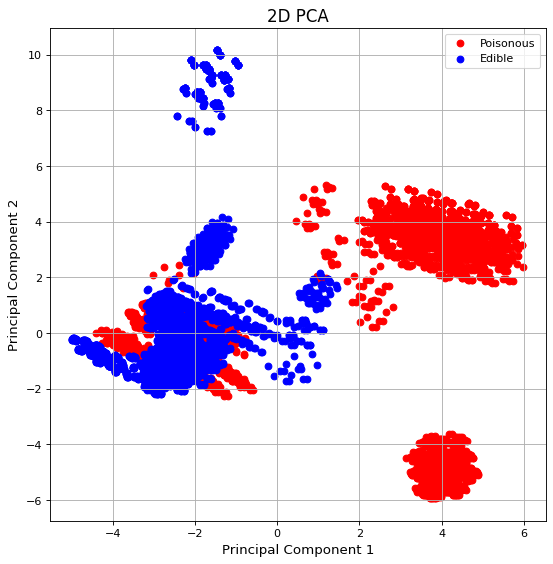

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['class']], axis = 1)
PCA_df['class'] = LabelEncoder().fit_transform(PCA_df['class'])
PCA_df.head()

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['r', 'b']
for clas, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['class'] == clas, 'PC1'], 
                PCA_df.loc[PCA_df['class'] == clas, 'PC2'], 
                c = color)
 
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Poisonous', 'Edible'])
plt.grid()

t-SNE es una técnica de reducción de dimensionalidad no lineal que se usa típicamente para visualizar conjuntos de datos de alta dimensión. Algunas de las principales aplicaciones de t-SNE son el Procesamiento del Lenguaje Natural (NLP), el procesamiento del habla, etc…

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(X)
X_embedded.shape
#Resultado del código ejecutado
#(4, 2)

(4, 2)

# Clustering

El objetivo principal del aprendizaje no supervisado es descubrir patrones ocultos e interesantes en datos no etiquetados y se puede utilizar como una herramienta independiente para obtener información sobre la distribución de datos, observar las características de cada grupo e identificar comportamientos anómalos.

La agrupación en clústeres puede considerarse el problema de aprendizaje no supervisado más importante, y trata de encontrar una **estructura** en una colección de datos **no etiquetados**. El proceso se basa en organizar los distintos objetos en grupos cuyos miembros son similares entre sí y diferentes con las observaciones de los otros cluster.

La aplicación más usada del clustering es en tareas de **segmentación** de mercado, donde se trata de agrupar una base de datos de clientes en distintos segmentos o grupos. Cada uno de ellos está caracterizado por unas ciertas **propiedades** que ayudan a describir cómo son, cómo se comportan y cuáles son sus intereses, para poder ofrecerles productos y servicios personalizados y adecuados a sus gustos e intereses. Estas segmentaciones se aplican en diferentes sectores retail, banca, seguros, deporte. Hay otros tipos de aplicaciones como determinar los distintos patrones climáticos de una región, agrupar artículos o noticias por temas, descubrir zonas con elevadas tasas de criminalidad.

## k-Means

Importamos el dataset con la función load_iris() en la variable data y lo separamos en 2 partes, d1 y d2, para los datos y la variable target que identifica el tipo de flor. Recuerda que aunque la segmentación es un algoritmo no supervisado usaremos estas etiquetas para comprobar luego los resultados.

Lo siguiente es convertir **d1** y **d2** a **dataframes** para poder aprovechar al máximo pandas y nombramos las distintas columnas.

¿Qué aspecto tiene la variable target? Son unos valores numéricos comprendidos entre 0 y 2.

Para facilitar el análisis de los resultados vamos a **codificar** las especies con un diccionario de forma que a cada número le asignaremos el nombre de la especie:

- Setosa: 0
- Versicolor: 1
- Virginica: 2

Aplicamos el diccionario de etiquetas con la función **map()**

Finalmente, juntamos ambos dataframes con la función concat de pandas para generar el dataframe iris y mostramos el resultado por pantalla.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans 
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data = datasets.load_iris()

d1 = data.data
d2 = data.target

d1 = pd.DataFrame(d1,
                   columns=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'])
d2 = pd.DataFrame(d2,
                  columns=['Species'])

species_dic = {0:'setosa',
               1:'versicolor',
               2:'virginica'}

d2['Species'] = d2.Species.map(species_dic) 

iris = pd.concat([d1,d2],axis=1)
#d1.head()
iris
#Resultado del código ejecutado:

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Aplicamos el método describe() para ver las magnitudes de las distintas variables, aunque vemos que no hay diferencias excesivas en los promedios y que todas las variables se encuentran en el mismo orden de magnitud, es aconsejable escalar las variables antes de realizar cualquier modelo.

In [ ]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A continuación vamos a realizar varias **visualizaciones**, que nos van a permitir tener un conocimiento más profundo de los datos. Ten en cuenta que aunque este dataset es pequeño y más sencillo de analizar de lo habitual **esta tarea se puede llegar a alargar más de lo esperado en los distintos proyectos**.

El primer **gráfico** que vamos a realizar es el diagramas de cajas o boxplot tipo violín para ver la dispersión de las variables por tipo de especie. En este caso vamos a usar la librería seaborn. Observa que usamos un bucle **for** para iterar sobre las 4 columnas que componen el dataframe con la función **range(0,4)** que devuelve los enteros 0, 1, 2 y 3.

En este gráfico es importante que observemos cómo las variables toman rangos distintos para cada una de las clases, eso va a permitir diferenciar las clases en un espacio multidimensional.

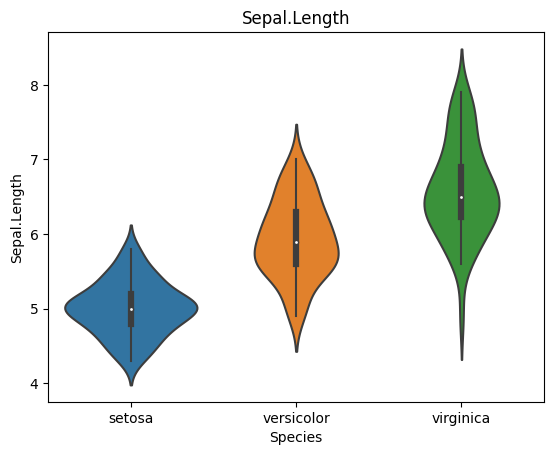

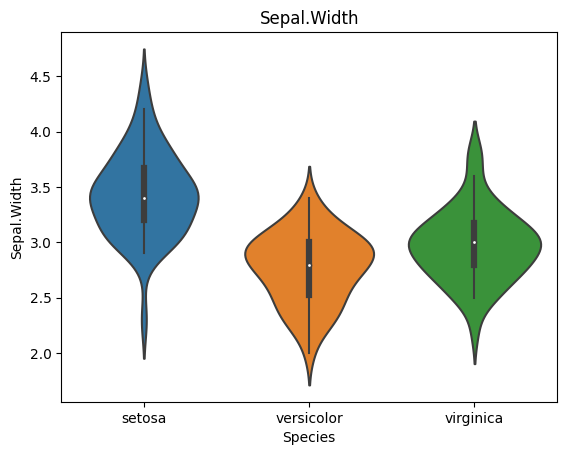

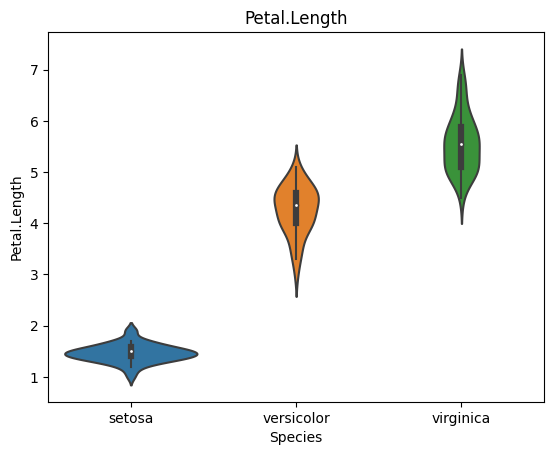

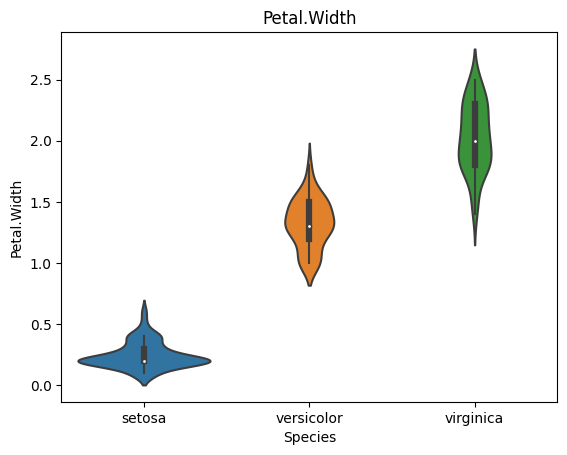

In [ ]:
names = iris.columns

for i in range(0,4):
    sns.violinplot(x=iris.Species,y=iris.iloc[:,i])
    plt.title(names[i])
    plt.show();
#Resultado del código ejecutado:

El siguiente gráfico que vamos a utilizar es un pairplot. A través de pairplot podemos observar la distribución de cada variable y un scatterplot de los cruces de variables.

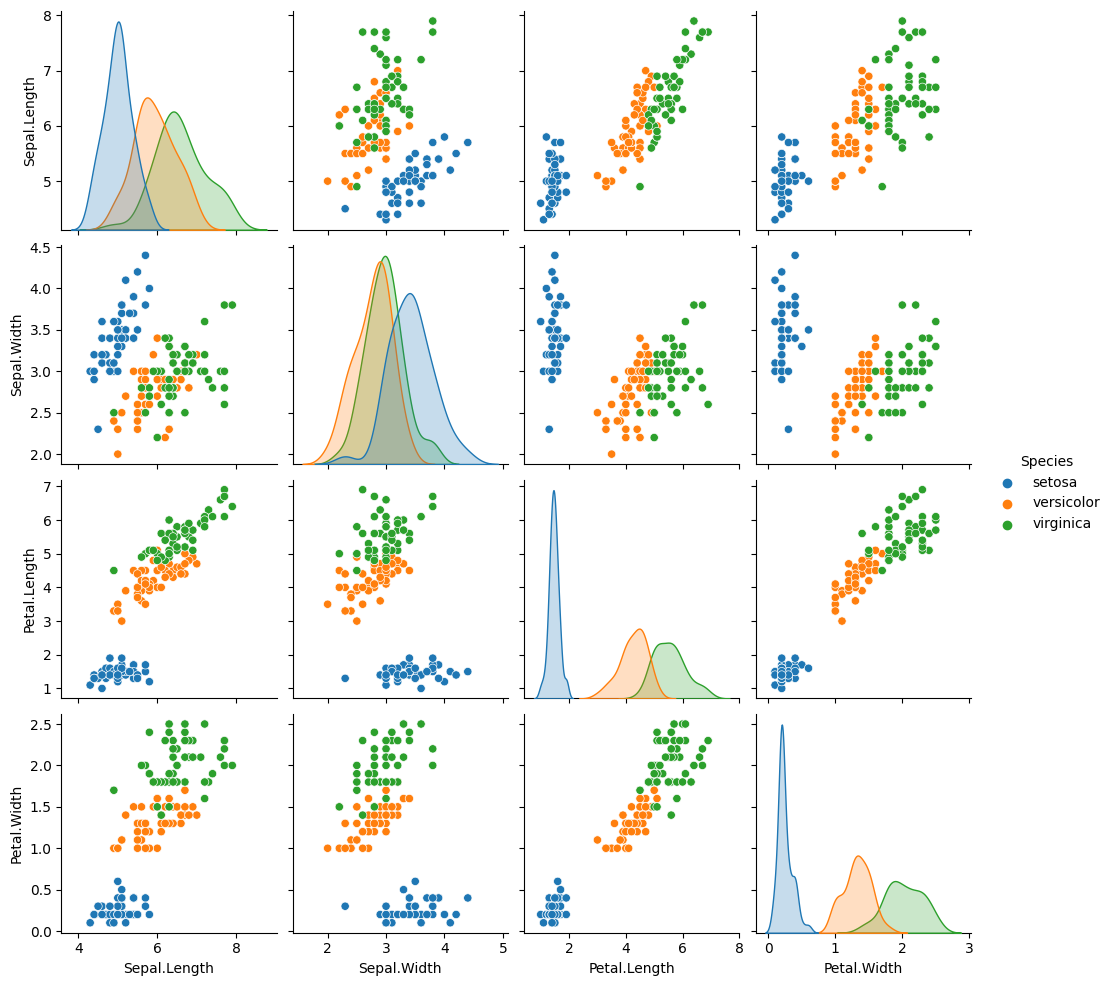

In [ ]:
sns.pairplot(iris, hue="Species")
plt.show()

Viendo el pairplot podemos observar como la variedad setosa, en color azul, es claramente diferente a las otras dos variedades donde se ve que la variable Sepal.Width tiene valores diferentes entre virginica y versicolor.

<Axes: xlabel='Sepal.Width', ylabel='Sepal.Length'>

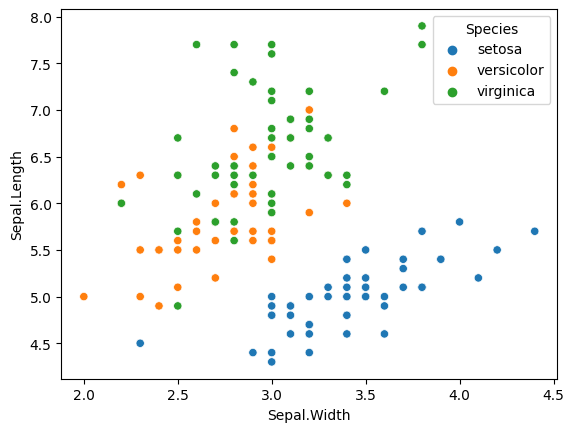

In [ ]:
sns.scatterplot(data=iris, x="Sepal.Width",y="Sepal.Length", hue="Species")

Una vez terminado el análisis inicial, estamos en disposición de empezar a entrenar el modelo, para ello como la entrada deben de ser sólo variables numéricas las seleccionamos con la función select_dtypes().

In [ ]:
df = iris.select_dtypes(include = 'number').copy()
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Segmentación con k-Means

In [ ]:
scl = StandardScaler()

df_scl = scl.fit_transform(df)
df_scl = pd.DataFrame(df_scl)
df_scl.describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


Seleccionamos el **número** de clústeres, k, y para ello vamos a realizar varias veces los cálculos usando valores de k con un rango de 2 a 10. Los principales parámetros de k-means son:

- **n_init** = nº de repeticiones a realizar.
- **n_clusters** = nº de cluster a agrupar.

Al obtener la salida del modelo los principales atributos de k-means son:

- **labels_**: la etiqueta del **segmento** identificado para cada registro.
- **inertia_**: suma de las **distancias al cuadrado** de las muestras a su centroide más cercano.
- **cluster_centers_**: los **centroides** de cada cluster.

Y los métodos que vamos a utilizar para el modelado son:

- **fit()**: para **entrenar** el modelo.
- **predict()**: para **asignar** el segmento de cada registro.
- **get_params()**: para extraer los parámetros del **modelo entrenado**.

In [ ]:
#Creamos el espacio de soluciones
soluciones = list(range(2,11))
print(soluciones)
#Creamos varias listas para ir guardando la salida de cada métrica
codo = []
silueta = []
calins = []

#Probamos las diferentes soluciones
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(random_state=1234, n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df_scl)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df_scl, cluster.labels_))
    calins.append(calinski_harabasz_score(df_scl, cluster.labels_))

    
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins}).set_index('Solucion')
              

metricas
#Resultado del código ejecutado:

[2, 3, 4, 5, 6, 7, 8, 9, 10]


,Codo,Silueta,Calins
Solucion,,,
2,222.361705,0.581750,251.349339
3,139.825435,0.459378,241.893262
4,114.097485,0.386594,207.254837
5,90.807283,0.341947,203.268233
6,80.022496,0.325677,187.139278
7,71.047810,0.328761,177.439584
8,62.303025,0.329215,175.072835
9,54.476559,0.353030,176.495191
10,47.460589,0.359987,181.098839


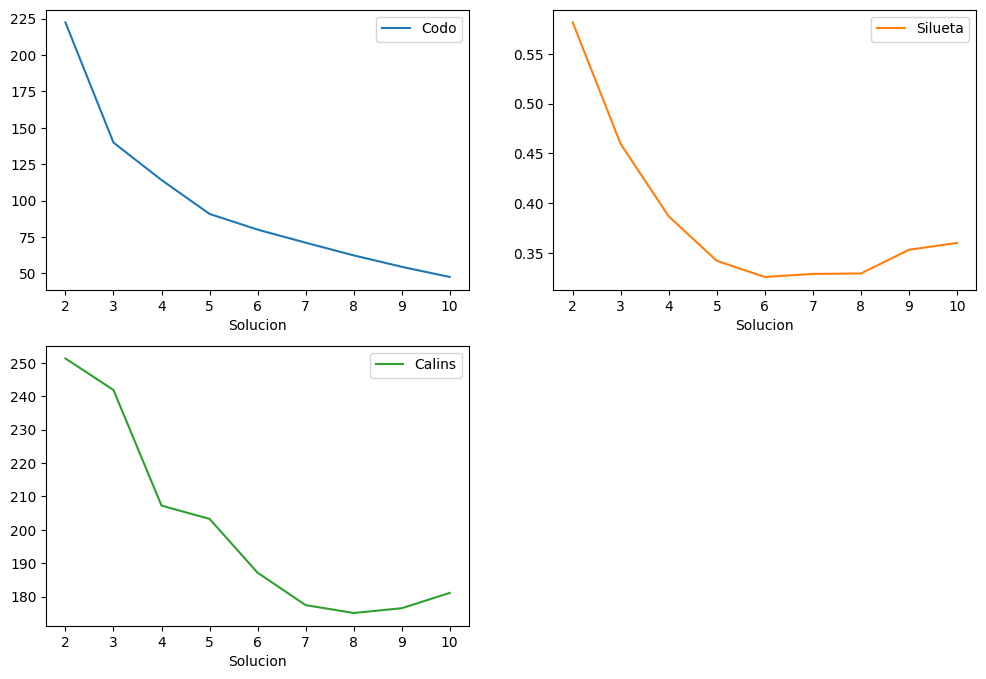

In [ ]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);
#Resultado del código ejecutado:

Vemos que **Silhoutte** y **Calinski** no nos ayudan a elegir el número de cluster ya que nos indican que el valor óptimo es 2 y al menos deberíamos tener tres, ya que son los 3 tipos de especies.

Probaremos con los valores de 3, 4 y 5 que es en la visualización del codo las que disminuyen la inercia.

Finalmente, nos quedamos con 3 clústeres ya que si visualizamos los resultados con 4 y 5 lo que obtenemos es el cluster de setosa en varios grupos y no necesitamos una mayor granularidad.

Una vez que hemos elegido la mejor versión de nuestro modelo tenemos que volver a entrenar el modelo sobre todos nuestros datos, predecimos e incluimos el resultado en el dataset para visualizarlo y compararlo con la variable Species.

In [ ]:
#Instanciar
cluster = KMeans(random_state=1234, n_clusters = 3, n_init=10)
    
#Entrenar
cluster.fit(df_scl)
#Resultado del código ejecutado:
KMeans(n_clusters=3, random_state=1234)

KMeans(n_clusters=3, random_state=1234)

In [ ]:
#Asignar segmento al data iris inicial
iris['cluster'] = cluster.predict(df_scl)

iris.head()
#Resultado del código ejecutado:

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


Perfilamos los cluster y vemos que el cluster 0 se inclina por la variedad virginica principalmente y los tamaños más grandes de versicolor, el cluster 1 es completo de setosa y el cluster 2 principalmente versicolor y valores más pequeños de virginica.

In [ ]:
iris.groupby(['cluster','Species']).agg({'Species': "count",
                                         'Sepal.Length': "mean",
                                        'Sepal.Width': "mean",
                                        'Petal.Length': "mean",
                                        'Petal.Width': "mean"})

Species  Sepal.Length  Sepal.Width  Petal.Length  \
cluster Species                                                        
0       versicolor       12      6.550000     3.108333      4.666667   
        virginica        36      6.852778     3.086111      5.766667   
1       setosa           50      5.006000     3.428000      1.462000   
2       versicolor       38      5.742105     2.663158      4.131579   
        virginica        14      5.907143     2.685714      5.000000   

                    Petal.Width  
cluster Species                  
0       versicolor     1.508333  
        virginica      2.108333  
1       setosa         0.246000  
2       versicolor     1.268421  
        virginica      1.814286

Graficamos los clústeres separando Sepal y Petal:

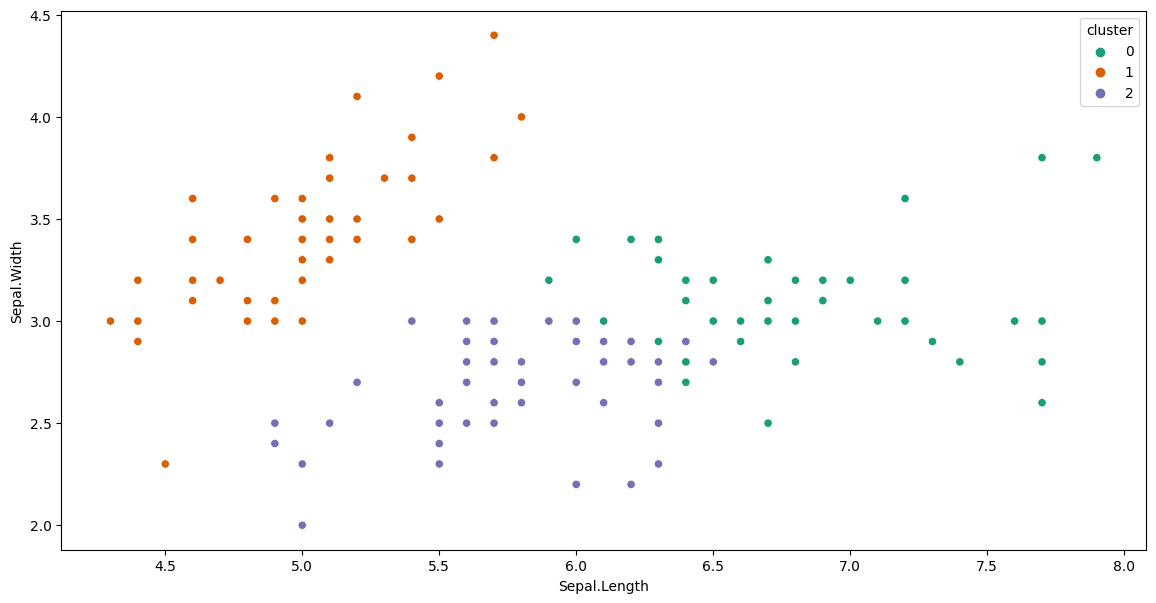

In [ ]:
plt.figure(figsize=(14,7)) 
sns.scatterplot(data = iris,
                x = 'Sepal.Length',
                y = 'Sepal.Width',
                hue = 'cluster',
                palette= 'Dark2');

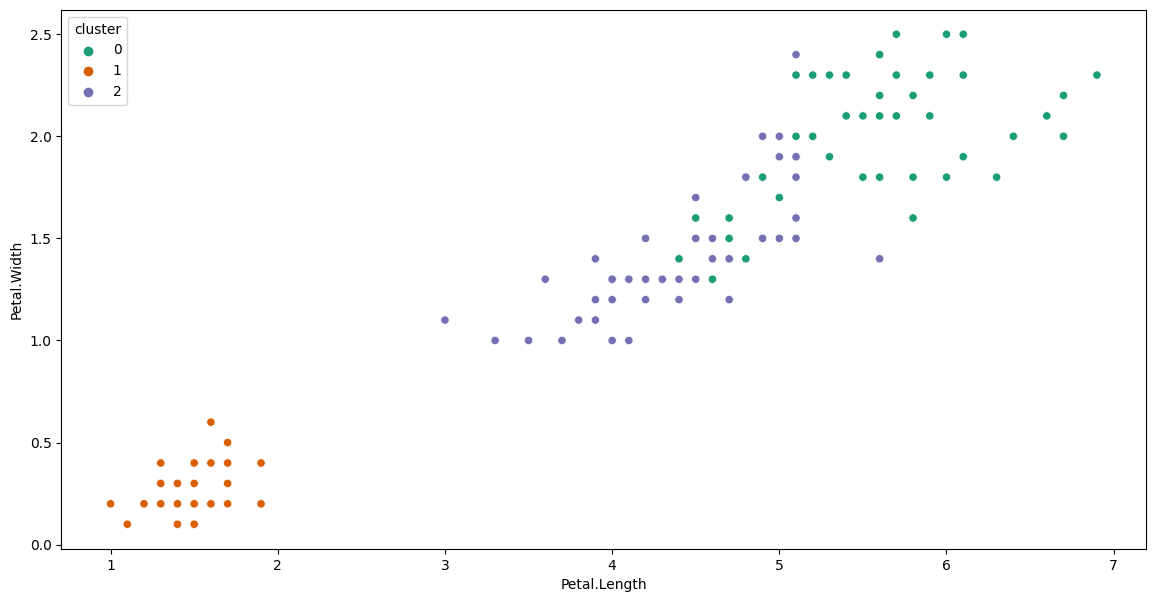

In [ ]:
plt.figure(figsize=(14,7)) 
sns.scatterplot(data = iris,
                x = 'Petal.Length',
                y = 'Petal.Width',
                hue = 'cluster',
                palette= 'Dark2');

Graficamos los promedios de todas las variables para cada cluster.

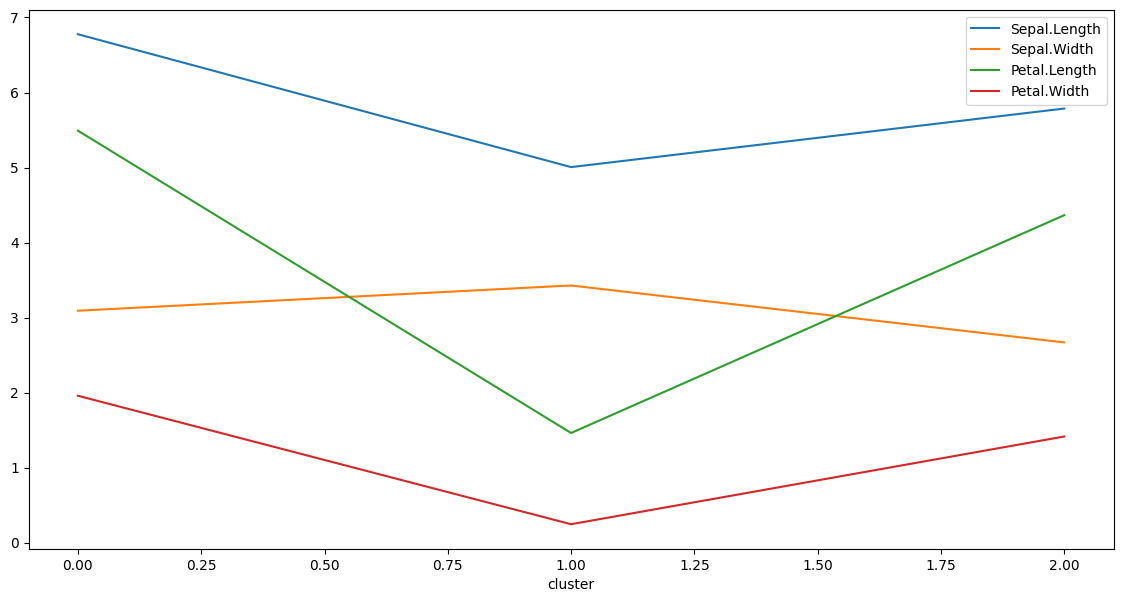

In [ ]:
iris.groupby(['cluster']).agg({'Sepal.Length': "mean",
                               'Sepal.Width': "mean",
                               'Petal.Length': "mean",
                                'Petal.Width': "mean"}).plot(figsize=(14,7));


## DBSCAN

**DBSCAN** (*Density-Based Spatial Clustering of Applications with Noise*) es un algoritmo basado en **densidades**, entendiéndose como densidad  al **número de observaciones** que se concentran en una misma zona.

DBSCAN está especialmente indicado para conjuntos de datos con **relaciones no lineales** a diferencia de K-means que funciona mejor con relaciones lineales.

DBSCAN a diferencia de K-Means no se ve influenciado por los **outliers** debido a la forma de agrupar las observaciones. Otra diferencia es que mientras con k-Means necesita especificar la **cantidad** de grupos o el número de clústeres para poder usarlo, DBSCAN no tiene que especificar la cantidad de clústeres para usarlo, pero si necesita dos parámetros:

- El número mínimo de observaciones para considerar la densidad (**min_samples** en sklearn). El valor generalmente usado es de 3 a 5, si usamos un valor bajo corre el riesgo de agrupar outliers y un valor muy alto puede descartar valores que no son outliers.
- La distancia entre observaciones llamada **epsilon** (eps en sklearn). La forma de calcular el valor más cercano al óptimo es estudiar las distancias para el valor de **min_samples**, visualizar las distancias y el punto donde se corresponda al punto de inflexión será el valor dado a la distancia entre observaciones. Si el valor elegido es muy pequeño obtendremos muchas observaciones con valor -1, es decir, que no se asignaran a ningún cluster y por el contrario, si el valor dado es muy alto las observaciones se clasificarán en un mismo cluster.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()#Resultado del código ejecutado:

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Vamos a eliminar la variable que identifica a cada cliente ya que no la vamos a usar para modelar y hacemos un describe para ver la magnitud de las variables:

In [ ]:
df.drop(columns='CustomerID',inplace=True)
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Nuestro siguiente paso es realizar diferentes visualizaciones del dataset para aprender todo lo posible sobre nuestros datos. En este caso vamos a analizar las diferencias entre hombres y mujeres en relación al resto de variables.

In [ ]:
df.groupby('Gender').agg({"Age":["count","mean"],
  'Annual Income (k$)':'mean',
  'Spending Score (1-100)':'mean'})

Age            Annual Income (k$) Spending Score (1-100)
       count       mean               mean                   mean
Gender                                                           
Female   112  38.098214          59.250000              51.526786
Male      88  39.806818          62.227273              48.511364

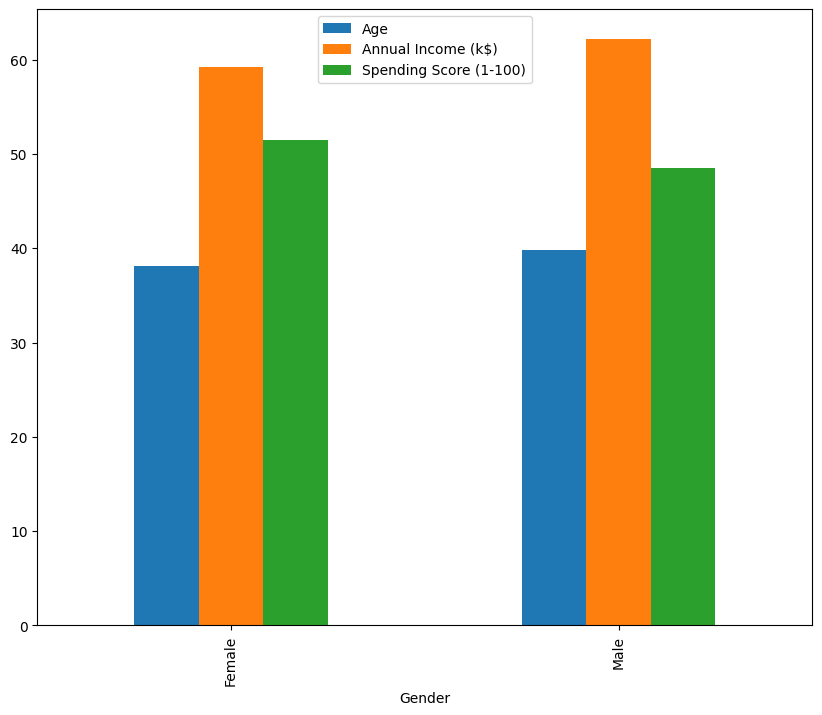

In [ ]:
df.groupby('Gender').mean().plot(kind='bar',figsize=(10,8));

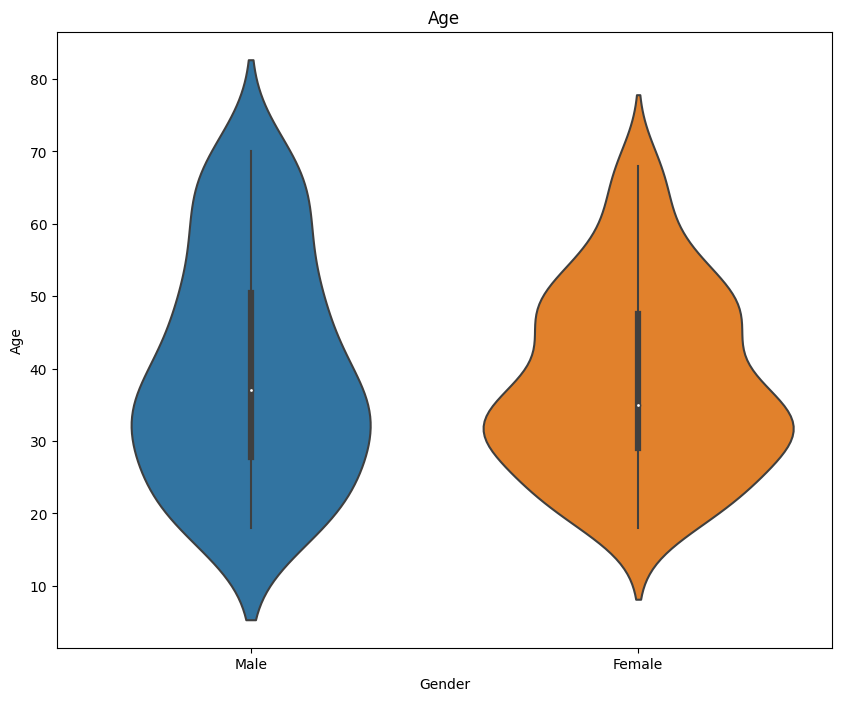

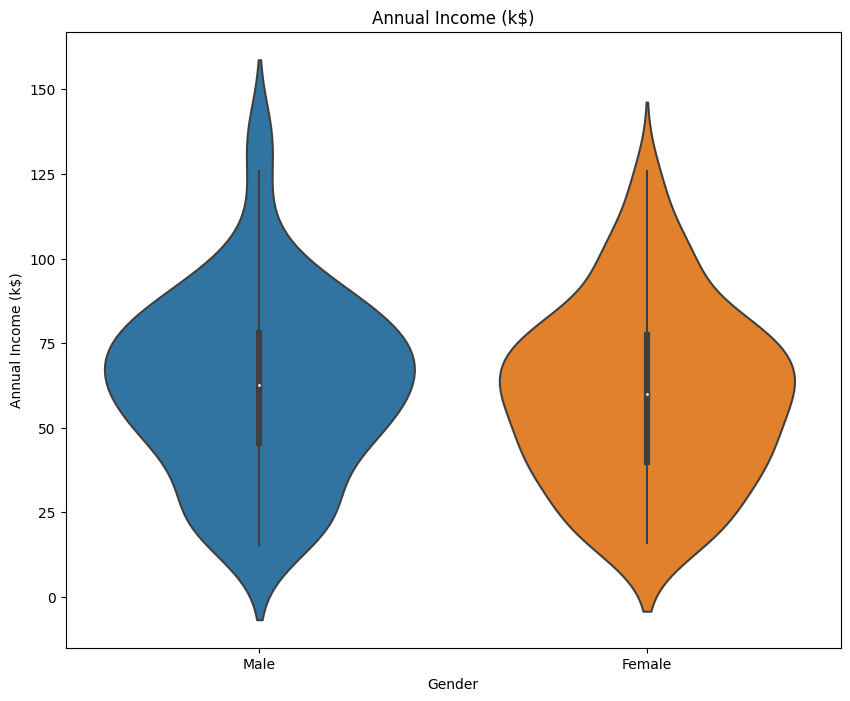

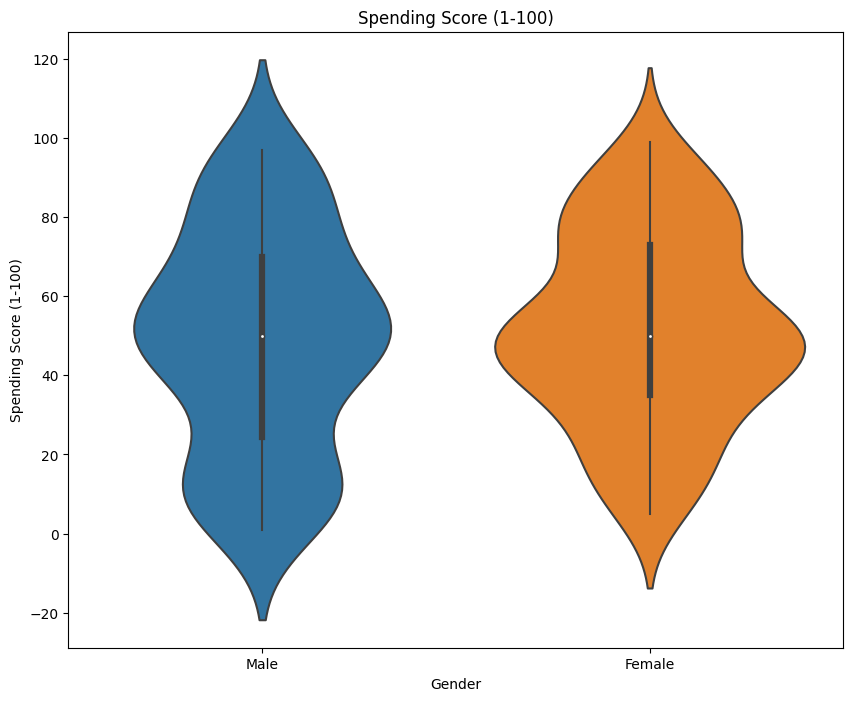

In [ ]:
names = df.columns
for i in range(1,4):
  plt.figure(figsize=(10,8))
  sns.violinplot(x=df.Gender,y=df.iloc[:,i])
  plt.title(names[i])
  plt.show();


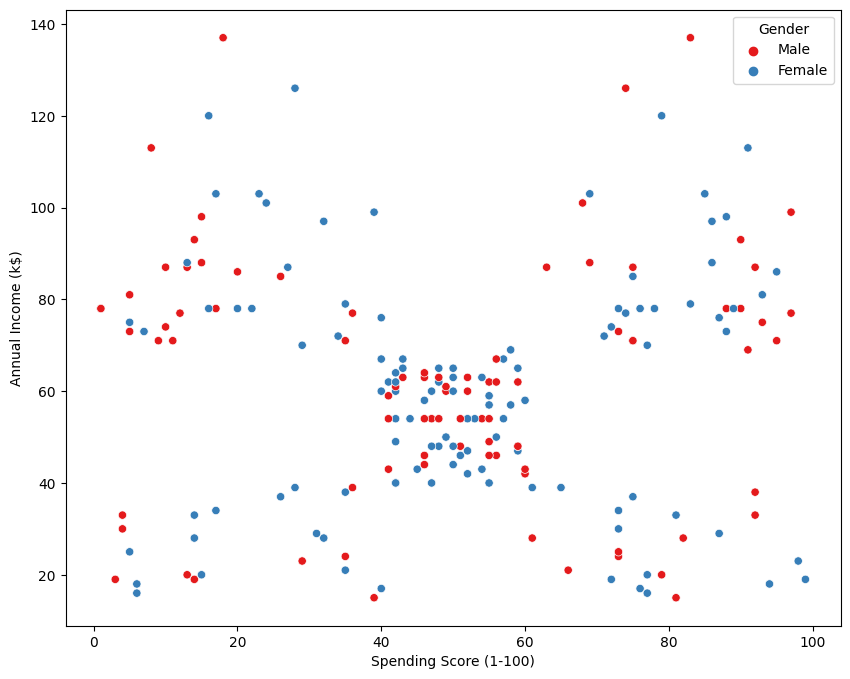

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Spending Score (1-100)'],
  y=df['Annual Income (k$)'],
  hue=df['Gender'],
  palette= 'Set1');

No parece que tengamos **outliers** y la **relación** entre el ingreso y el score no tiene una relación lineal clara. Calculamos la correlación para confirmarlo con la función **corr**:

In [ ]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Comenzamos la fase de modelado y para ello vamos a seleccionar las variables numéricas del dataset y las escalamos con el StandardScaler de sklearn. Comprobamos el resultado con la función describe.

In [ ]:
df_num = df.select_dtypes(include = 'number').copy()
df_num.info()

df_num_scl = StandardScaler().fit_transform(df_num)
pd.DataFrame(df_num_scl).describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


,0,1,2
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


Hemos visto que necesitamos **dos parámetros** para **DBSCAN**:

- Utilizaremos para el **min_samples** el mínimo recomendado ya que el dataset tiene un **número de observaciones pequeño** (**min_samples=3**)
- Para el valor de epsilon vamos a calcular las distancias para este valor de 3.

Para ello utilizamos el algoritmo **knn** (K vecinos) con k=3, representaremos la distancia y el valor que doble la curva será el valor de densidad elegido.

0.2851517131304658


Text(0, 0.5, 'Distance')

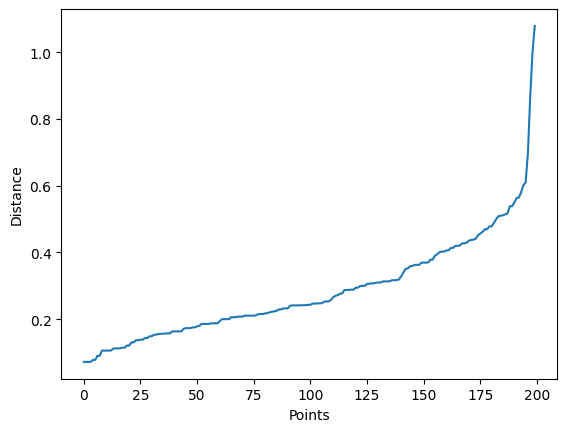

In [ ]:
from sklearn.neighbors import NearestNeighbors

k=3

d=pd.DataFrame(df_num_scl)
d_knn = d

# Calculamos KNN
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(d_knn)
distances, indices = neighbors.kneighbors(d_knn)
distances = np.sort(distances, axis=0)

# Distancias
distances = distances[:,1]
print(distances.mean())
i = np.arange(len(distances))

sns.lineplot(
  x = i,
  y = distances
)

plt.xlabel("Points")
plt.ylabel("Distance")

Vemos que el valor de epsilón óptimo está en torno a 0.6. Por lo tanto utilizaremos min_samples=3 y eps=0.6

In [ ]:
dbscan = DBSCAN(eps=0.6, min_samples=3).fit(df_num_scl)
labels = dbscan.labels_
df['dbscan']=labels
df.head()
#Resultado del código ejecutado:

,Gender,Age,Annual Income (k$),Spending Score (1-100),dbscan
0,Male,19,15,39,-1
1,Male,21,15,81,0
2,Female,20,16,6,-1
3,Female,23,16,77,0
4,Female,31,17,40,0


In [ ]:
df["dbscan"].value_counts()

 0    143
 1     39
-1     14
 2      4
Name: dbscan, dtype: int64

Entrenamos el modelo con dichos parámetros y añadimos la salida del modelo al dataset para poder identificar donde se ha clasificado cada observación y poder visualizarlas.

Podemos observar que el modelo crea tres clústeres y deja 14 observaciones (con valor -1) sin clasificar que el experto de la compañía tiene que estudiar a parte, confirmando los datos primero.

Vamos a realizar diferentes visualizaciones para analizar los resultados.

number of noise(s):  14


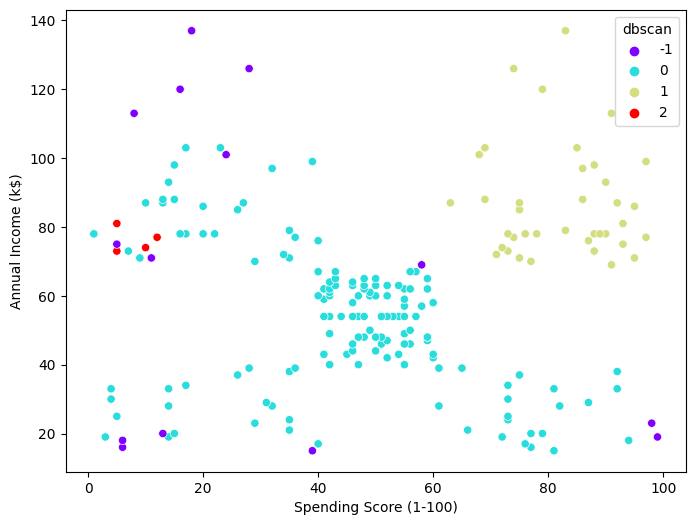

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Spending Score (1-100)'],
  y=df['Annual Income (k$)'],
  hue=df['dbscan'],
  palette= 'rainbow')

n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

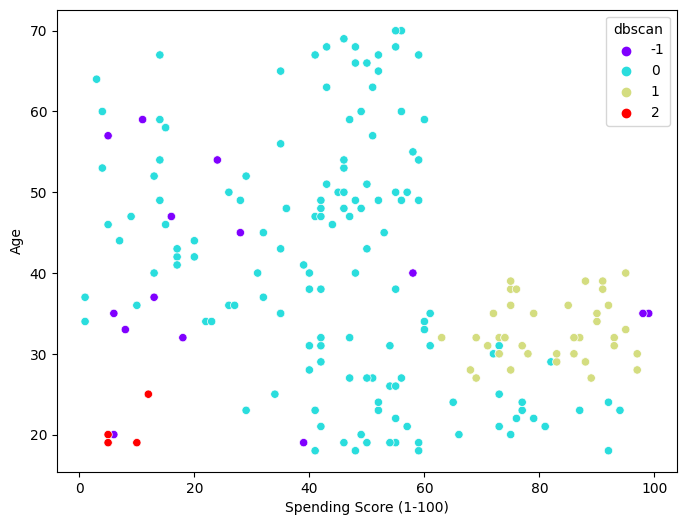

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Spending Score (1-100)'],
  y=df['Age'],
  hue=df['dbscan'],
  palette= 'rainbow');

Una vez creados los clústeres y visualizados cómo se agrupan, vemos cómo se perfilan los individuos en cada cluster en media. Utilizamos la variable Gender para ver cómo se distribuye dentro de cada cluster:

In [ ]:
df.groupby(['dbscan','Gender']).agg({"Age":["count","mean"],
  'Annual Income (k$)':'mean',
  'Spending Score (1-100)':'mean'})

Age            Annual Income (k$) Spending Score (1-100)
              count       mean               mean                   mean
dbscan Gender                                                           
-1     Female     9  40.888889          63.000000              37.777778
       Male       5  36.000000          71.200000              17.800000
 0     Female    82  39.304878          51.975610              45.317073
       Male      61  43.295082          53.229508              43.606557
 1     Female    21  32.190476          86.047619              81.666667
       Male      18  33.277778          87.111111              82.666667
 2     Male       4  20.750000          76.250000               8.000000

# Detección de anomalías

## Isolation Forest

La principal idea de Isolation Forest, a diferencia del control de outliers, es identificar las observaciones anómalas en lugar de buscar el perfil de las observaciones normales. Tenemos que interpretarlo como un árbol de decisión, ver como es capaz de llegar a la conclusión de que un punto es anómalo.

**Pasos:**
1.   Escoge una observación dentro del dataset.
2.   Escoge un valor aleatorio dentro del mínimo y el máximo de cada variable.
3.   Crea una rama si el valor del registro al que estamos mirando es mayor o menor que el valor aleatorio anterior, repetiremos el ejercicio de evaluar nuestro punto con el mínimo y máximo de nuestro intervalo, esta vez más acotado, siendo el nuevo máximo o el mínimo el punto de corte de la rama creada.
4.  Ejecutar el tercer paso hasta que no podamos ramificar más y el punto a evaluar esté aislado.

De esta forma, cuantas menos ramas haya necesitado el árbol para aislar al punto, más anómalo será. Una gran ventaja de este algoritmo en comparación a otros métodos es que no utiliza medidas de distancias, lo que le hace computacionalmente muy rápido en comparación y especialmente útil en dataset muy grandes.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

df = pd.read_csv('german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


Analizamos el dataset para ver si hay **valores únicos, duplicados, missings o atípicos** y tomar acciones.

- Lo primero que observamos con el comando info es que existe una variable ‘Unnamed: 0’ que vamos a eliminar.
- Obtenemos el número de valores únicos para cada variable con el comando **nunique**
- Para analizar los duplicados usamos **duplicated**

In [7]:
df.info()

# Eliminamos la primera columna

df.drop(columns=['Unnamed: 0'],inplace=True)
df.info()

df.nunique().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2

Sex                   2
Housing               3
Checking account      3
Job                   4
Saving accounts       4
Purpose               8
Duration             33
Age                  53
Credit amount       921
dtype: int64

In [8]:
df.shape

(1000, 9)

In [9]:
df.duplicated().sum()

0

Vamos a separar las variables categóricas y las numéricas para hacer un análisis detallado de ellas para ver la cantidad de nulos y los diferentes valores que toman:

- **Categóricas**
    - Hacemos la selección con **select_dtypes** y la opción de **exclude**. No olvides crear la copia del dataframe
    - Obtenemos la cantidad de nulos con **isna** y la suma por columnas con el comando **sum**. Para facilitar el análisis usamos el comando **sort_values**
    - Obtenemos un conteo de los valores que toman algunas variables como ‘Saving accounts’ y ‘Checking accounts’ con **value_counts**. Para no distorsionar los resultados usamos la opción de **dropna**.
    - Rellenemos los missings de estas variables con ‘little’ y ‘desconocido’ ya que son los más frecuentes

In [10]:
# Categóricas

cat = df.select_dtypes(exclude = 'number').copy()

cat.isna().sum().sort_values(ascending = False)

df['Saving accounts'].value_counts(dropna=False)

df['Checking account'].value_counts(dropna=False)

# Para Saving accounts sustituimos los NA por el valor 'little' que es el más frecuente con diferencia
df['Saving_accounts'] = df['Saving accounts'].fillna('little')

# Para Checking account el 40% de las obs son NaN y los dos valores más frecuentes tienen valores muy
# parecidos, por lo que creamos una nueva categoría 'desconocido'. Podriamos aleatorizar sobre 'little' o 
# 'moderate'
df['Checking_account'] = df['Checking account'].fillna('desconocido')
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Saving_accounts,Checking_account
0,67,male,2,own,NaN,little,1169,6,radio/TV,little,little
1,22,female,2,own,little,moderate,5951,48,radio/TV,little,moderate
2,49,male,1,own,little,NaN,2096,12,education,little,desconocido
3,45,male,2,free,little,little,7882,42,furniture/equipment,little,little
4,53,male,2,free,little,little,4870,24,car,little,little
...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,little,desconocido
996,40,male,3,own,little,little,3857,30,car,little,little
997,38,male,2,own,little,NaN,804,12,radio/TV,little,desconocido
998,23,male,2,free,little,little,1845,45,radio/TV,little,little


- **Numéricas**
    - Hacemos la selección de variables usando la opción de **include**
    - Obtenemos la cantidad de nulos y observamos que no existen en estas columnas.
    - Para analizar los outliers o atípicos vamos a construir una función que analice cada columnas y que obtenga el umbral para cada una. Dicho umbral se define como:
    
    media +- desviación estándar * N
    
    - Visualizamos los boxplots que consideramos necesario, en este caso de las variables con valores atípicos.

In [13]:
# Numéricas

num = df.select_dtypes(include = 'number').copy()

num.isna().sum().sort_values(ascending = False)

def conteo_atipicos(df,variable, num_desv_tip = 4):
  '''
  Función para contar valores atípicos
  '''
  def atipicos_desv_tip(variable, num_desv_tip = 4):
    '''
    Creamos un IC
    '''
    #sacamos los nulos para el cálculo de los estadísticos
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

  atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
  return(df.loc[atipicos,variable].value_counts().sort_index())

var_atipicos_dt = ['Age','Credit amount','Duration']

for variable in var_atipicos_dt:
  print('\n' + variable + ':\n')
  print(conteo_atipicos(num,variable,num_desv_tip=4))



Age:

Series([], Name: Age, dtype: int64)

Credit amount:

14782    1
14896    1
15653    1
15672    1
15857    1
15945    1
18424    1
Name: Credit amount, dtype: int64

Duration:

72    1
Name: Duration, dtype: int64


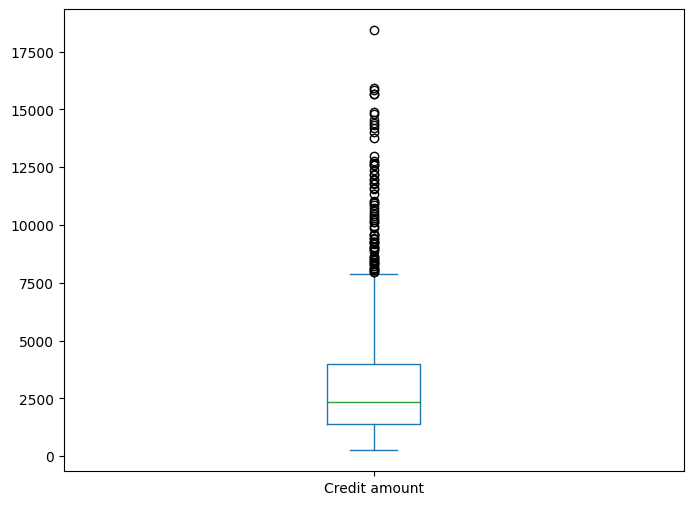

In [14]:
num['Credit amount'].plot(kind='box',figsize=(8,6));

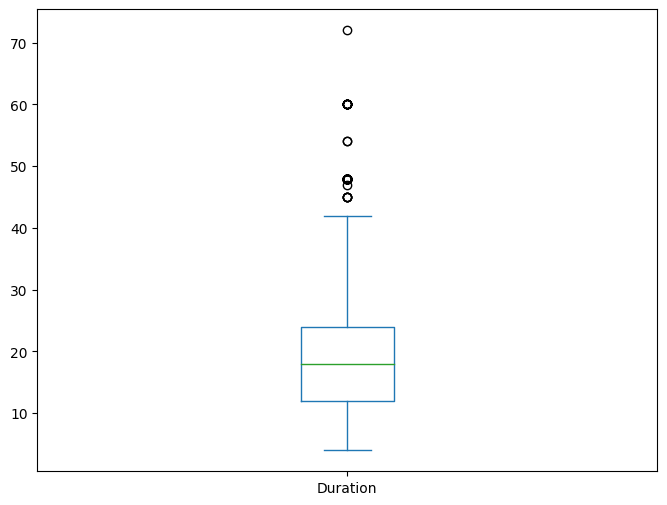

In [12]:
num.Duration.plot(kind='box',figsize=(8,6));

Para poder utilizar las variables en el modelo tenemos que codificar aquellas que son categóricas, ya que el modelo no entiende variables que no tengan un formato numérico, lo hacemos con el método de sklearn LabelEncoder y le cambiamos el nombre para no reemplazar las variables originales y poder mantener una trazabilidad de los datos.

In [15]:
cat.columns

# Categorizamos las variables para poder usarlas en el modelo
categorical = ['Sex', 'Housing', 'Saving_accounts', 'Checking_account', 'Purpose']

encoder = LabelEncoder()
for label in categorical:
  label1 = label + '_enc'
  print(label1)
  df[label1] = encoder.fit_transform(df[label])

Sex_enc
Housing_enc
Saving_accounts_enc
Checking_account_enc
Purpose_enc


In [17]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Saving_accounts,Checking_account,Sex_enc,Housing_enc,Saving_accounts_enc,Checking_account_enc,Purpose_enc
0,67,male,2,own,NaN,little,1169,6,radio/TV,little,little,1,1,0,1,5
1,22,female,2,own,little,moderate,5951,48,radio/TV,little,moderate,0,1,0,2,5
2,49,male,1,own,little,NaN,2096,12,education,little,desconocido,1,1,0,0,3
3,45,male,2,free,little,little,7882,42,furniture/equipment,little,little,1,0,0,1,4
4,53,male,2,free,little,little,4870,24,car,little,little,1,0,0,1,1


Estandarizamos las variables numéricas para eliminar la influencia de la magnitud con StandardScaler. Incluimos las variables que codificaban los valores de las variables categóricas por consistencia.

In [18]:
df.columns

# seleccionamos las variables numéricas y las categorizadas

df = df.loc[:,['Age','Job','Credit amount','Duration','Sex_enc', 'Housing_enc', 'Saving_accounts_enc','Checking_account_enc', 'Purpose_enc']]
df.head()

,Age,Job,Credit amount,Duration,Sex_enc,Housing_enc,Saving_accounts_enc,Checking_account_enc,Purpose_enc
0,67,2,1169,6,1,1,0,1,5
1,22,2,5951,48,0,1,0,2,5
2,49,1,2096,12,1,1,0,0,3
3,45,2,7882,42,1,0,0,1,4
4,53,2,4870,24,1,0,0,1,1


In [19]:
df = df.loc[:,['Age','Job','Credit amount','Duration','Sex_enc', 'Housing_enc', 'Saving_accounts_enc',
  'Checking_account_enc', 'Purpose_enc']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
data_scaled = pd.DataFrame(X_scaled, columns=df.columns)
data_scaled.head()

,Age,Job,Credit amount,Duration,Sex_enc,Housing_enc,Saving_accounts_enc,Checking_account_enc,Purpose_enc
0,2.766456,0.146949,-0.745131,-1.236478,0.670280,-0.133710,-0.463409,-0.001045,1.073263
1,-1.191404,0.146949,0.949817,2.248194,-1.491914,-0.133710,-0.463409,1.044372,1.073263
2,1.183312,-1.383771,-0.416562,-0.738668,0.670280,-0.133710,-0.463409,-1.046463,0.061705
3,0.831502,0.146949,1.634247,1.750384,0.670280,-2.016956,-0.463409,-0.001045,0.567484
4,1.535122,0.146949,0.566664,0.256953,0.670280,-2.016956,-0.463409,-0.001045,-0.949853


Vamos a obtener un Análisis de Componentes Principales (PCA) para poder pintar las dos primeras componentes y así ver en un scatterplot la máxima información posible, ya que cada componente aglutina un grupo de variables. Un poco más adelante tendréis la oportunidad de profundizar en esta técnica, por el momento nos centramos en el aspecto práctico y en saber qué nos sirve para representar en 2 dimensiones nuestros datos.

In [20]:
# Procesamos un PCA para poder pintar las dos primeras componentes

pca = PCA() #n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

X_pca

array([[-0.54760083,  2.52984256, -0.73830856, ..., -0.47044258,
         1.7323688 ,  0.05759451],
       [ 1.17341002, -2.47086958, -1.23692113, ...,  0.74990509,
        -0.45521924, -0.66822595],
       [-0.71645631,  1.67667933,  0.08272946, ...,  1.17674048,
         0.52412829,  0.21707566],
       ...,
       [-0.77358701,  0.9741025 , -0.08717731, ...,  0.09315718,
         0.07957685, -0.09314816],
       [ 1.3512007 ,  0.01564918, -1.12721116, ...,  0.91950189,
        -1.81331125, -1.37986637],
       [ 1.60792046, -0.89476066,  0.15457375, ...,  0.12390776,
        -0.40667137, -0.98182052]])

Llega el momento de modelar e instanciamos el modelo [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) de sklearn cuyos **parámetros** más importantes son:

- **n_estimators**: la cantidad de árboles en el bosque. Por defecto es 100.
- **max_samples**: para cada árbol, el número o proporción de muestras. Por defecto es ‘auto’, lo calcula el algoritmo.
- **contamination**: este es el parámetro más crítico, el usuario establece la proporción de puntos anormales en la muestra. Por defecto es ‘auto’ lo determina el algoritmo.
- **max_features**: para cada árbol, el número o proporción de características.

Los **métodos** más importantes son:

- **fit()**: método para entrenar el modelo.
- **predict()**: devuelve dos valores: 1 si la observación es normal o -1 si el algoritmo lo considera atípica.
- **decision_function()**: devuelve la puntuación anormal de la muestra. Cuanto menor sea el valor, más probable es que sea una muestra anormal. Está relacionada con el parámetro contamination, si no se incluye en la instancia del modelo, decision_function restará 0.5, interpretando los valores normales como positivos 0 y los anormales los negativos. Si los valores se encuentran en torno 0,5 el modelo no está muy seguro de si la muestra es atípica o no. Puedes consultar el detalle aquí: *[scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest.decision_function)*

Para visualizar los resultados vamos a utilizar las dos primeras componentes del PCA para los ejes **x** e **y**, y asignaremos el color de las muestras en función de la etiqueta del modelo. Observa que los **valores atípicos** se localizan en los puntos del **exterior**. Además, ten en cuenta que es una representación en dos dimensiones de un conjunto de datos con muchas dimensiones.

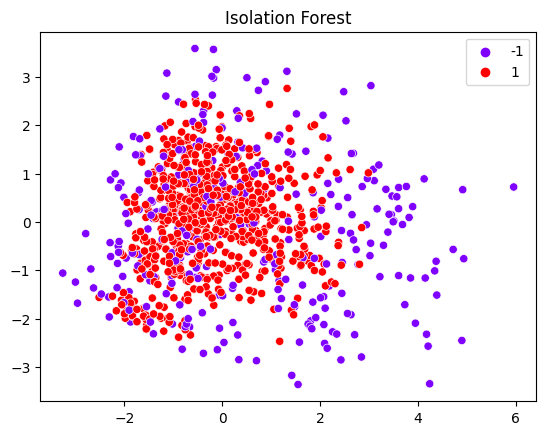

In [21]:
IsoFrst = IsolationForest (n_estimators=100)#,contamination=0.15)
IsoFrst.fit(X_scaled)
outliers = IsoFrst.predict(X_scaled)
anomaly_score = IsoFrst.decision_function(X_scaled)

plt.title('Isolation Forest')
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue=outliers, palette='rainbow');

Incluimos los valores atípicos en el dataset y el valor de decision_function. Vemos que el 31 % de los valores los considera anómalos, algo excesivo. Analizamos el anomaly score y vemos que los valores más anómalos aparecen con una valor por debajo de -0.05 aproximadamente.

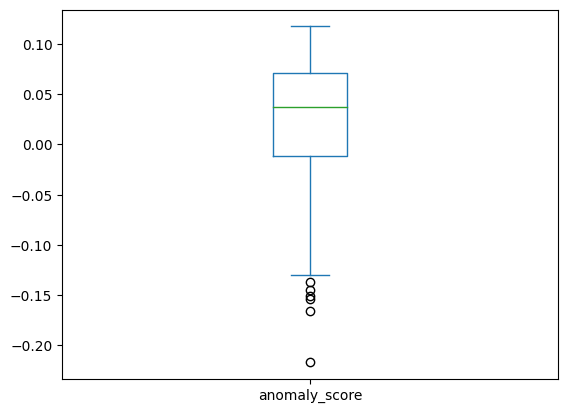

In [22]:
df['cluster_isoForest'] = outliers
df['anomaly_score'] = anomaly_score

df['cluster_isoForest'].value_counts()

df['anomaly_score'].plot(kind='box');

Para calcular el valor de corte, vamos a calcular el mínimo de su intervalo de confianza, IC, y consideraremos anómalos aquellos valores por debajo de este valor para ver cómo cambia el número.

outliers mean:  0.026554726760085544
outliers std:  0.057199850862934075
outliers min:  -0.03064512410284853


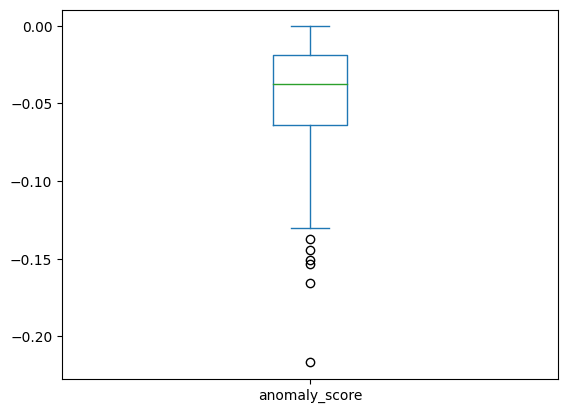

In [23]:
out_mean = float(df['anomaly_score'].mean())
print('outliers mean: ',out_mean)
out_std = float(df['anomaly_score'].std())
print('outliers std: ',out_std)
out_min = float(out_mean - out_std)
print('outliers min: ',out_min)

df.loc[df['cluster_isoForest'] == -1,['anomaly_score']].plot(kind='box');

# Sistemas de recomendación

# Recomendación Apriori



In [26]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [28]:
file='Groceries_dataset.csv'
df = pd.read_csv(file)
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [30]:
df.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [31]:
all_products=df['itemDescription'].value_counts()
all_products

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

Para aplicar el modelo Apriori necesitamos generar previamente un dataset donde tengamos para cada consumidor y fecha todos los productos adquiridos.

In [32]:
transactions = df.groupby(['Member_number','Date'])['itemDescription'].unique().reset_index()
transactions

,Member_number,Date,itemDescription
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"
...,...,...,...
14958,4999,24-01-2015,"[tropical fruit, berries, other vegetables, yo..."
14959,4999,26-12-2015,"[bottled water, herbs]"
14960,5000,09-03-2014,"[fruit/vegetable juice, onions]"
14961,5000,10-02-2015,"[soda, root vegetables, semi-finished bread]"


Con el dataset transactions creado aplicamos la función TransactionEncoder para generar la matriz lógica donde tenemos para cada consumidor/fecha el valor **True** o **False** en los productos comprados.

Aplicamos el método para generar la matriz lógica.

In [33]:
#Usar TransactionEncoder de mlxtend

# Preparamos la matriz para aplicar el algoritmo aprioiri
te = TransactionEncoder()
encoder = te.fit(transactions.itemDescription)
onehot = encoder.transform(transactions.itemDescription)
dfonehot = pd.DataFrame(onehot, columns=encoder.columns_)
dfonehot.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


El modelo Apriori dispone de varios parámetros:

- **min_support**: un valor entre 0 y 1 para **soporte mínimo** de los conjuntos de elementos devueltos.
- **use_colnames**: si **True** devuelve el **nombre** de las variables en el dataframe de salida.
- **max_len**: **longitud máxima** de los conjuntos de elementos generados. Por defecto es **None**, quiere decir que se generen **todos los conjuntos posibles**.
- **verbose**: valor entero mayor de 0, por defecto es 0, si es >=1 muestra el número de combinaciones encontradas.
- **low_memory**: por defecto es False, si es True busca combinaciones por **debajo** del **min_support**, esta opción es aconsejable sólo para dataset grandes.

Aplicamos el algoritmo para extraer aquellos itemsets, incluidos los formados por un único item, que hayan sido comprados al menos **50 veces**. En un caso real, este valor sería posiblemente bajo si se tiene en cuenta la cantidad total de transacciones, por ello usamos 50 para que en los resultados aparezcan un número suficiente de itemsets y reglas de asociación, aunque nos centraremos en aquellas que tienen un único antecedente para identificar las **reglas más fuertes**.

Aplicamos un soporte mínimo de 50/38765 = 0.0013 por ejemplo

In [36]:
# TBC
frequent_itemsets = apriori(dfonehot, min_support=50/len(df), use_colnames=True)

frequent_itemsets.sort_values('support',ascending=False)

,support,itemsets
138,0.157923,(whole milk)
85,0.122101,(other vegetables)
101,0.110005,(rolls/buns)
115,0.097106,(soda)
139,0.085879,(yogurt)
...,...,...
349,0.001337,"(whole milk, flour)"
221,0.001337,"(root vegetables, brown bread)"
359,0.001337,"(tropical fruit, frankfurter)"
369,0.001337,"(pip fruit, frozen vegetables)"


Se han encontrado 555 reglas, de uno o varios productos.

Aplicamos la función **association_rules** para generar las reglas y cálculo del soporte, confianza y mejora de la confianza (lift). Los parámetros de la función son:

- **metric**: es la métrica a utilizar para comprobar que la regla es **significativa** o no. Por defecto es ‘confidence’ y puede tomar los valores 'support', 'confidence', 'lift', 'leverage', o 'conviction'. Los más utilizados son support, confidence o lift.
- **min_threshold**: es el **límite mínimo** para evaluar la métrica seleccionada.
- **support_only**: por defecto es False. Es útil usarla cuando el dataset no esta completo y puede generar NANs, en este caso **acelera** el proceso ya que no usa todas las métricas.

Utilizaremos la métrica de **lift** y con un mínimo valor de 1.5 y lo **ordenamos** descendentemente.

In [37]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
10,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532
6,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
11,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307
2,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726
3,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081
8,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
9,(whole milk),"(sausage, yogurt)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596
1,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704
0,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129


In [38]:
# TBC
rules=rules.sort_values(['confidence','lift'],ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
6,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
7,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
1,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704
3,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081


Seleccionamos aquellos antecedentes con un único producto para hacer más fácil la selección de la regla.

In [39]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules = rules[ (rules['antecedent_len'] == 1) ]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704,1
3,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081,1
5,(napkins),(pastry),0.022121,0.051728,0.001738,0.078550,1.518529,0.000593,1.029109,1
4,(pastry),(napkins),0.051728,0.022121,0.001738,0.033592,1.518529,0.000593,1.011869,1
2,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726,1
0,(sausage),(beverages),0.060349,0.016574,0.001537,0.025471,1.536764,0.000537,1.009129,1
10,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532,1
11,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307,1
9,(whole milk),"(sausage, yogurt)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596,1


Si lo ordenamos por confidence y lift, tendremos las reglas más influyentes.

In [40]:
# TBC
rules1=rules.sort_values(['confidence','lift'],ascending=False)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1,(beverages),(sausage),0.016574,0.060349,0.001537,0.092742,1.536764,0.000537,1.035704,1
3,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081,1
5,(napkins),(pastry),0.022121,0.051728,0.001738,0.078550,1.518529,0.000593,1.029109,1
4,(pastry),(napkins),0.051728,0.022121,0.001738,0.033592,1.518529,0.000593,1.011869,1
2,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726,1


Vamos a visualizar estas reglas con un scatter plot:

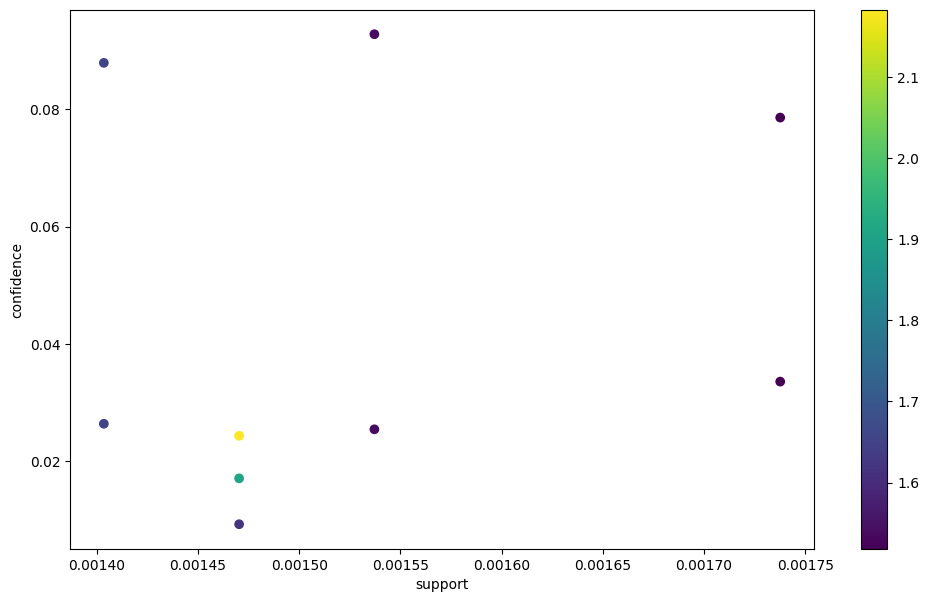

In [41]:
plt.figure(figsize=(12, 7))

plt.scatter(rules1["support"], rules1["confidence"], c=rules1["lift"])
plt.xlabel('support')
plt.ylabel('confidence')
plt.colorbar()
plt.show()

Vemos que las reglas más significativas a recomendar son:

- beverage => sausages
- specialty chocolate => citrus fruit
- napkins (servilletas) => pastry (pastelería)